Bibliotecas:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importação e Leitura dos Dados:

In [3]:
dados = pd.read_csv('/dados/modalidade.csv')

In [4]:
dados.head()

,ano,mes,sigla_uf,ddd,cnpj,empresa,porte_empresa,modalidade,acessos
0,2005,2,SP,11,2558157000162,VIVO,Grande Porte,Pré-pago,4362642
1,2005,2,SP,11,2558157000162,VIVO,Grande Porte,Pós-pago,1016008
2,2005,2,SP,11,4206050000180,TIM,Grande Porte,Pré-pago,1770510
3,2005,2,SP,11,4206050000180,TIM,Grande Porte,Pós-pago,385276
4,2005,2,SP,11,40432544000147,CLARO,Grande Porte,Pré-pago,1863716


In [5]:
dados.columns.values

array(['ano', 'mes', 'sigla_uf', 'ddd', 'cnpj', 'empresa',
       'porte_empresa', 'modalidade', 'acessos'], dtype=object)

In [6]:
colunasSelecionadas = [
       'ano', 'mes', 'sigla_uf', 'ddd', 'cnpj', 'empresa',
       'porte_empresa', 'modalidade', 'acessos']
dadosSelecionados = dados.filter(items = colunasSelecionadas)
dadosSelecionados

,ano,mes,sigla_uf,ddd,cnpj,empresa,porte_empresa,modalidade,acessos
0,2005,2,SP,11,2558157000162,VIVO,Grande Porte,Pré-pago,4362642
1,2005,2,SP,11,2558157000162,VIVO,Grande Porte,Pós-pago,1016008
2,2005,2,SP,11,4206050000180,TIM,Grande Porte,Pré-pago,1770510
3,2005,2,SP,11,4206050000180,TIM,Grande Porte,Pós-pago,385276
4,2005,2,SP,11,40432544000147,CLARO,Grande Porte,Pré-pago,1863716
...,...,...,...,...,...,...,...,...,...
8539102,2021,7,TO,63,40432544000147,CLARO,Grande Porte,Pós-pago,107
8539103,2021,7,TO,63,40432544000147,CLARO,Grande Porte,Pós-pago,2
8539104,2021,7,TO,63,40432544000147,CLARO,Grande Porte,Pós-pago,141
8539105,2021,7,TO,63,40432544000147,CLARO,Grande Porte,Pós-pago,119


Número de ocorrências de provedores por Estado na Lista:

In [7]:
colunaEstado = dadosSelecionados['sigla_uf']
colunaEstado.value_counts().sort_index()

AC      32412
AL     147258
AM      80195
AP      24301
BA     609865
CE     290287
DF       4719
ES     143947
GO     366586
MA     293262
MG    1284535
MS     131677
MT     209060
PA     223870
PB     268457
PE     301104
PI     233231
PR     669053
RJ     217955
RN     214837
RO      80396
RR      20105
RS     743272
SC     489421
SE     104362
SP    1185722
TO     169218
Name: sigla_uf, dtype: int64

Empresas com maior número de ocorrência na Lista:

In [8]:
colunaEmpresa = dadosSelecionados['empresa']
colunaEmpresa.value_counts(ascending=False)

OI                                3008286
TIM                               2035250
VIVO                              1790936
CLARO                             1479319
NEXTEL                             110547
ALGAR (CTBC TELECOM)                57837
SURF TELECOM SA                     42043
AMERICA NET S.A.                     8878
PREFEITURA DE LONDRINA/COPEL         2380
DATORA                               1616
J. SAFRA TELECOMUNICACOES LTDA        889
PORTO SEGURO                          875
LIGUE MOVEL LTDA                      186
UNICEL                                 34
TERAPAR TELECOMUNICAÇÕES LTDA          31
Name: empresa, dtype: int64

Modalidades de utilização (Pré-Pago vs Pós-Pago) - Número total de ocorrências na lista:

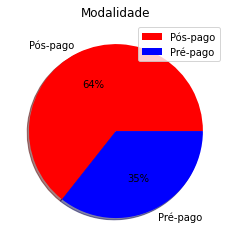

In [10]:
grafico_modalidade = dadosSelecionados['modalidade'].value_counts()
colors = ['#FF0000','#0000FF']
plt.pie(grafico_modalidade, labels = grafico_modalidade.index, autopct='%1.i%%', colors=colors, shadow=True)

plt.legend()

plt.title('Modalidade')
plt.show()

Modalidades de utilização (Pré-Pago vs Pós-Pago) por Região:

In [11]:
def numero_em_cima(rects, ax): 
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

In [12]:
dic_regioes = {'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
                'Norte': ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC'],
                'Centro Oeste': ['MT', 'MS', 'GO'], 
                'Sudeste': ['SP', 'RJ', 'ES', 'MG'],
                'Sul': ['PR', 'RS', 'SC']}
tipos = ['Pré-pago', 'Pós-pago']
dic_01 = {i: [ len([k for k in list(dados.loc[dados['modalidade'] == i, ['sigla_uf']]['sigla_uf'])
                    if k in dic_regioes[j]]) for j in dic_regioes.keys()] for i in tipos}

dic_01['Região'] = list(dic_regioes.keys())
dados_regioes = pd.DataFrame(dic_01)

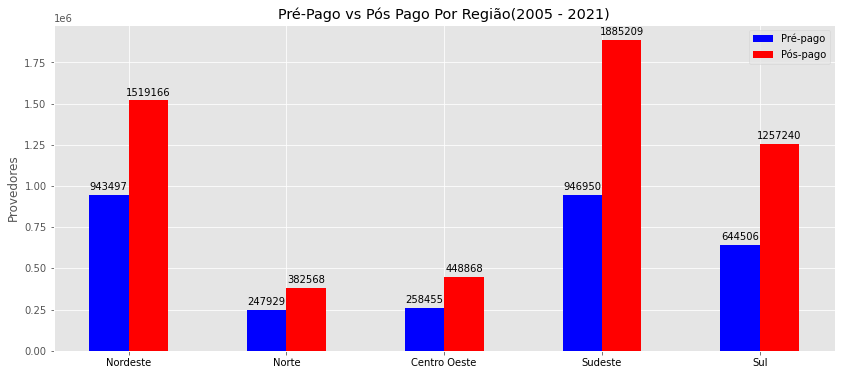

In [14]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(14, 6))

width = 0.25
r1 = np.arange(5)
r2 = [ x + width for x in r1]
r3 = [ x + width for x in r2]

rects1 = ax.bar(r1, dados_regioes['Pré-pago'], width, label='Pré-pago', color='#0000ff')
rects2 = ax.bar(r2, dados_regioes['Pós-pago'], width, label='Pós-pago', color='#ff0000')


ax.set_ylabel('Provedores')
ax.set_title('Pré-Pago vs Pós Pago Por Região(2005 - 2021)', color='#000000')
ax.set_xticks(r1 + 0.125)
ax.set_xticklabels(dados_regioes['Região'], color='#000000')
ax.legend()

numero_em_cima(rects1, ax)
numero_em_cima(rects2, ax)

plt.show()

Número total de acessos por Empresa:

In [15]:
acessoPorEmpresa = dadosSelecionados[['acessos']].groupby(dadosSelecionados['empresa'], sort=True).sum()

acessoPorEmpresa = acessoPorEmpresa.sort_values(by = ['acessos'], ascending=[False])
acessoPorEmpresa

,acessos
empresa,
VIVO,12431739391
TIM,10181849983
CLARO,10135176994
OI,7280023603
NEXTEL,222112269
ALGAR (CTBC TELECOM),196179556
PORTO SEGURO,25781209
DATORA,24683279
PREFEITURA DE LONDRINA/COPEL,13928373


Top 5 Empresas com maior número de acessos:

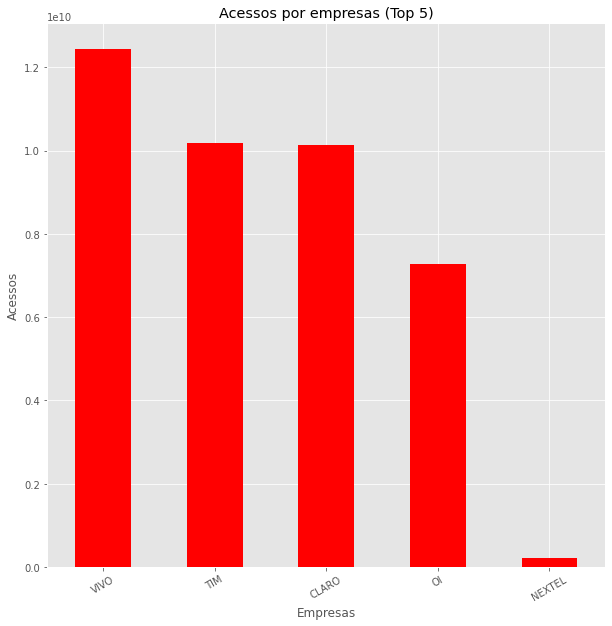

In [16]:
dadosSelecionados[['acessos']].groupby(dadosSelecionados['empresa'], sort=True).sum().sort_values(by = ['acessos'], ascending=[False])[:5].plot(kind="bar", figsize=(10, 10), color=['#ff0000'])


plt.title("Acessos por empresas (Top 5)")
plt.xlabel("Empresas")
plt.ylabel("Acessos")

plt.xticks(rotation=30, horizontalalignment="center")
plt.legend().remove()

Número total de acessos por modalidade:

In [17]:
acessoPorModalidade = dadosSelecionados[['acessos']].groupby(dadosSelecionados['modalidade'], sort=True).sum().sort_values(by = ['acessos'], ascending=[False])

acessoPorModalidade

,acessos
modalidade,
Pré-pago,29000755684
Pós-pago,11535109384


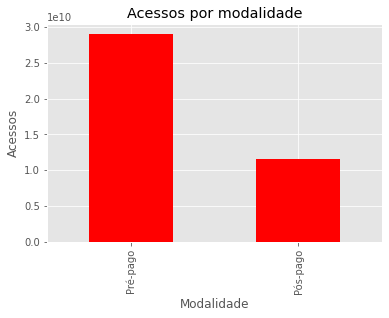

In [18]:
acessoPorModalidade.plot(kind='bar', color=['#ff0000'])
plt.title("Acessos por modalidade")
plt.xlabel("Modalidade")
plt.ylabel("Acessos")
plt.legend().remove()

Quebra de dados em conjunto de treino e conjunto de teste:

In [27]:
from sklearn.model_selection import train_test_split

In [59]:
x = pd.get_dummies(dadosSelecionados[dadosSelecionados.columns[:-4]])
y = pd.get_dummies(dadosSelecionados[dadosSelecionados.columns[-4:]])
print(x.shape, y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

(8539107, 31) (8539107, 20)


In [60]:
print(f"Tamanho de x_train: {x_train.shape}")
print(f"Tamanho de x_test: {x_test.shape}")
print(f"Tamanho de y_train: {y_train.shape}")
print(f"Tamanho de y_test: {y_test.shape}")

Tamanho de x_train: (5977374, 31)
Tamanho de x_test: (2561733, 31)
Tamanho de y_train: (5977374, 20)
Tamanho de y_test: (2561733, 20)


Treina um estimador do scikit-learn de aprendizagem supervisionada regressor no conjunto de treino:

In [61]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [62]:
clf.fit(x_train, y_train)

LinearRegression()

Verifica o desempenho do estimador do scikit-learn no conjunto de teste:

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = clf.predict(x_test)

print(f"Acurácia de Teste: ±{mean_absolute_error(y_test, y_pred):1.0f}")

Acurácia de Teste: ±886
